# 데이터 분석

## 출력 확인

In [ ]:
import os
import numpy as np
import pandas as pd

BASE_PATH = '/content/llm-classification-finetuning'
TRAIN_PATH  = os.path.join(BASE_PATH, 'train.csv')
TEST_PATH   = os.path.join(BASE_PATH, 'test.csv')
SAMPLE_PATH = os.path.join(BASE_PATH, 'sample_submission.csv')
OUT_PATH = os.path.join(BASE_PATH, 'submission.csv')

df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

# 조건 정의
conditions = [
    df_train['winner_model_a'] == 1,
    df_train['winner_model_b'] == 1,
    df_train['winner_tie'] == 1
]

# 각 조건에 대응하는 값
values = [0, 1, 2]

# label 열 추가
df_train['label'] = np.select(conditions, values)

In [ ]:
df_train.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,label
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,1
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,2
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,1


In [ ]:
df_test.head()

,id,prompt,response_a,response_b
0,136060,"[""I have three oranges today, I ate an orange ...","[""You have two oranges today.""]","[""You still have three oranges. Eating an oran..."
1,211333,"[""You are a mediator in a heated political deb...","[""Thank you for sharing the details of the sit...","[""Mr Reddy and Ms Blue both have valid points ..."
2,1233961,"[""How to initialize the classification head wh...","[""When you want to initialize the classificati...","[""To initialize the classification head when p..."


## Winning Distribution

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

counts = df_train['label'].value_counts().reset_index()
counts.columns = ['Winner', 'Win Count']

fig = px.bar(counts, x='Winner', y='Win Count',
             title='Winner distribution for Train Data',
             labels={'Winner': 'Winner', 'Win Count': 'Win Count'},
             color='Winner', color_continuous_scale='viridis')

fig.update_layout(xaxis_title="Winner", yaxis_title="Win Count")

fig.show()

## train 토큰 분포 확인

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-xsmall")
df_train['prompt_tokens'] = df_train['prompt'].apply(lambda x: len(tokenizer.encode(str(x))))
df_train['response_a_tokens'] = df_train['response_a'].apply(lambda x: len(tokenizer.encode(str(x))))
df_train['response_b_tokens'] = df_train['response_b'].apply(lambda x: len(tokenizer.encode(str(x))))
df_train['total_tokens'] = (
    df_train['prompt_tokens']
    + df_train['response_a_tokens']
    + df_train['response_b_tokens']
)

df_train[['prompt_tokens', 'response_a_tokens', 'response_b_tokens', 'total_tokens']].describe()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
 

,prompt_tokens,response_a_tokens,response_b_tokens,total_tokens
count,57477.000000,57477.000000,57477.000000,57477.000000
mean,102.043948,345.802547,348.628965,796.475460
std,320.134878,419.311586,433.176993,912.143676
min,7.000000,5.000000,5.000000,20.000000
25%,17.000000,100.000000,100.000000,307.000000
50%,27.000000,264.000000,266.000000,601.000000
75%,64.000000,450.000000,452.000000,960.000000
max,9359.000000,21895.000000,17693.000000,39294.000000


# driver 마운트

In [1]:
from google.colab import drive
import shutil
drive.mount('/content/drive')

Mounted at /content/drive


# 깃 클론

In [2]:
%cd /content
!git clone https://github.com/CSE-MLP/TeamProject2.git

/content
Cloning into 'TeamProject2'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (73/73), done.
Receiving objects: 100% (107/107), 26.91 KiB | 3.36 MiB/s, done.
remote: Total 107 (delta 64), reused 72 (delta 32), pack-reused 0 (from 0)
Resolving deltas: 100% (64/64), done.


In [3]:
%cd /content/TeamProject2
!git pull

/content/TeamProject2
Already up to date.


# 모델 학습

In [ ]:
%cd /content/TeamProject2
!python train.py \
  --train_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/train.csv" \
  --out_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/submission.csv" \
  --chkpt_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/chkpoint/TID_lr_5e-1" \
  --model_name "microsoft/deberta-v3-xsmall" \
  --device "cuda" \
  --seed 42 \
  --grad_clip 1.0 \
  --epochs 3 \
  --lr 5e-1 \
  --batch_size 64 \
  --amp

/content/TeamProject2
2025-11-05 18:35:59.007528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762367759.029227   57632 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762367759.035765   57632 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762367759.052918   57632 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762367759.052946   57632 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762367759.052950   57632 computation_placer.cc:177] 

In [ ]:
%cd /content/TeamProject2
!python train.py \
  --train_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/train.csv" \
  --out_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/submission.csv" \
  --chkpt_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/chkpoint/TID_lr_1e-2" \
  --model_name "microsoft/deberta-v3-xsmall" \
  --device "cuda" \
  --seed 42 \
  --grad_clip 1.0 \
  --epochs 3 \
  --lr 1e-2 \
  --batch_size 64 \
  --amp

/content/TeamProject2
2025-11-05 18:12:46.034517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762366366.056324   51801 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762366366.063095   51801 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762366366.079906   51801 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762366366.079934   51801 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762366366.079937   51801 computation_placer.cc:177] 

In [ ]:
%cd /content/TeamProject2
!python train.py \
  --train_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/train.csv" \
  --out_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/submission.csv" \
  --chkpt_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/chkpoint/TID_lr_5e-2" \
  --model_name "microsoft/deberta-v3-xsmall" \
  --device "cuda" \
  --seed 42 \
  --grad_clip 1.0 \
  --epochs 3 \
  --lr 5e-2 \
  --batch_size 64 \
  --amp

/content/TeamProject2
2025-11-05 17:49:33.584651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762364973.606939   45964 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762364973.613572   45964 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762364973.630207   45964 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762364973.630233   45964 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762364973.630236   45964 computation_placer.cc:177] 

In [ ]:
%cd /content/TeamProject2
!python train.py \
  --train_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/train.csv" \
  --out_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/submission.csv" \
  --chkpt_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/chkpoint/TID_lr_1e-3" \
  --model_name "microsoft/deberta-v3-xsmall" \
  --device "cuda" \
  --seed 42 \
  --grad_clip 1.0 \
  --epochs 3 \
  --lr 1e-3 \
  --batch_size 64 \
  --amp

/content/TeamProject2
2025-11-05 16:39:47.799529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762360787.820484   28030 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762360787.826878   28030 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762360787.842708   28030 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762360787.842735   28030 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762360787.842738   28030 computation_placer.cc:177] 

In [ ]:
%cd /content/TeamProject2
!python train.py \
  --train_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/train.csv" \
  --out_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/submission.csv" \
  --chkpt_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/chkpoint/TID_lr_5e-4" \
  --model_name "microsoft/deberta-v3-xsmall" \
  --device "cuda" \
  --seed 42 \
  --grad_clip 1.0 \
  --epochs 3 \
  --lr 5e-4 \
  --batch_size 64 \
  --amp

/content/TeamProject2
2025-11-05 17:03:11.706622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762362191.728147   34130 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762362191.734686   34130 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762362191.751174   34130 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762362191.751205   34130 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762362191.751208   34130 computation_placer.cc:177] 

In [ ]:
%cd /content/TeamProject2
!python train.py \
  --train_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/train.csv" \
  --out_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/submission.csv" \
  --chkpt_path "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/chkpoint/TID_lr_5e-5" \
  --model_name "microsoft/deberta-v3-xsmall" \
  --device "cuda" \
  --seed 42 \
  --grad_clip 1.0 \
  --epochs 3 \
  --lr 5e-5 \
  --batch_size 64 \
  --amp

/content/TeamProject2
2025-11-05 22:16:51.062072: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-05 22:16:51.079934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762381011.102659    1689 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762381011.109366    1689 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762381011.126007    1689 computation_placer.cc:177] computation placer already registered. Please check link

# 모델 테스트

/content/TeamProject2/step3


/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Confusion Matrix (counts):
 [[2228 1139  663]
 [1073 2235  621]
 [1204 1214 1119]]

Confusion Matrix (row-normalized):
 [[0.553 0.283 0.165]
 [0.273 0.569 0.158]
 [0.34  0.343 0.316]]

Classification Report:

              precision    recall  f1-score   support

       A win      0.495     0.553     0.522      4030
       B win      0.487     0.569     0.525      3929
         tie      0.466     0.316     0.377      3537

    accuracy                          0.486     11496
   macro avg      0.482     0.479     0.475     11496
weighted avg      0.483     0.486     0.478     11496



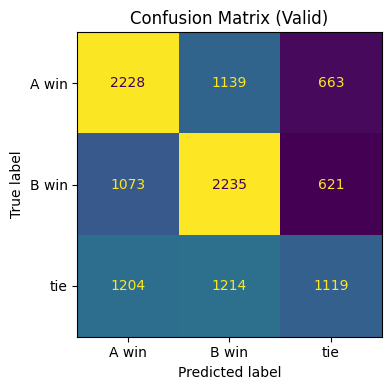

In [7]:
%cd /content/TeamProject2/step3
from model import TIDAutoBertClassification
from data import TwoInputDataset, pad_collate_fn_TID
from utils import load, set_seed

from transformers import AutoTokenizer

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

seed = 42
set_seed(seed)
DATA_PATH="/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/llm-classification-finetuning/train.csv"
df = pd.read_csv(DATA_PATH)
df_train, df_valid = train_test_split(df, test_size=0.2, random_state=seed)
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
path = "/content/drive/MyDrive/머신러닝프로젝트01분반 team12/project2/data/chkpoint/TID_lr_5e-5/epoch_3"
model, tokenizer = load(path, device=device,
                        model_class=TIDAutoBertClassification,
                        tokenizer_class=AutoTokenizer)
model.to(device)

batch_size = 8
valid_loader = DataLoader(
    TwoInputDataset(df_valid,tokenizer),
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True,
    collate_fn=lambda b: pad_collate_fn_TID(b, pad_token_id=tokenizer.pad_token_id)
)

model.eval()
all_preds = []
with torch.no_grad():
    for input_ids1, attention_mask1, input_ids2, attention_mask2, labels in valid_loader:
        bs = labels.size(0)
        input_ids1 = input_ids1.to(device)
        attention_mask1 = attention_mask1.to(device)
        input_ids2 = input_ids2.to(device)
        attention_mask2 = attention_mask2.to(device)
        labels = labels.to(device)

        logits = model(input_ids1, attention_mask1, input_ids2, attention_mask2)
        preds = torch.argmax(logits, dim=1)
        all_preds.append(preds.cpu().numpy())

label_cols = ['winner_model_a', 'winner_model_b', 'winner_tie']
y_true = df_valid[label_cols].to_numpy().argmax(axis=1)
y_pred = np.concatenate(all_preds, axis=0)

# 5) 혼동행렬 계산 (원시/정규화 둘 다)
class_names = ["A win", "B win", "tie"]
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
cm_norm = confusion_matrix(y_true, y_pred, labels=[0,1,2], normalize="true")

print("Confusion Matrix (counts):\n", cm)
print("\nConfusion Matrix (row-normalized):\n", np.round(cm_norm, 3))

# 6) 분류 리포트(정밀도/재현율/F1)
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=3))

# 7) 시각화(옵션)
fig, ax = plt.subplots(figsize=(4.5, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, values_format='d', colorbar=False)
plt.title("Confusion Matrix (Valid)")
plt.tight_layout()
plt.show()